# Projeto de Machine Learning

## Análise dos dados

In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mno

### Aquisição de dados

In [232]:
df_kidney = pd.read_csv('kidney_disease.csv')
df_kidney.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [233]:
df_kidney.tail()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd
399,399,58.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,53,6800,6.1,no,no,no,good,no,no,notckd


Para a apresentação acho interessante deixar os nomes das colunas em Português, acho que vai ficar mais fácil para explicar e cria maior interesse

In [234]:
df_kidney.columns = ['id', 'idade', 'pressao_sang', 'gravidade_espec', 'albumina', 'acucar', 'glob_vermelhos', 'cel_pus',
              'aglomerados_cel_pus', 'bacteria', 'glicose_sang_aleatoria', 'ureia_sang', 'creatinina_serica', 'sodio',
              'potassio', 'hemoglobina', 'volume_globular', 'cont_glob_brancos', 'cont_glob_vermelhos',
              'hypertensao', 'diabetes_mellitus', 'doenca_arterial_coronariana', 'apetite', 'edema_pedal',
              'anemia', 'classe']

In [235]:
df_kidney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           400 non-null    int64  
 1   idade                        391 non-null    float64
 2   pressao_sang                 388 non-null    float64
 3   gravidade_espec              353 non-null    float64
 4   albumina                     354 non-null    float64
 5   acucar                       351 non-null    float64
 6   glob_vermelhos               248 non-null    object 
 7   cel_pus                      335 non-null    object 
 8   aglomerados_cel_pus          396 non-null    object 
 9   bacteria                     396 non-null    object 
 10  glicose_sang_aleatoria       356 non-null    float64
 11  ureia_sang                   381 non-null    float64
 12  creatinina_serica            383 non-null    float64
 13  sodio               

### Verificação dos dados e suas variações

Dados do tipo "object"

In [236]:
df_kidney_cat = df_kidney.select_dtypes(object)
for col in df_kidney_cat.columns:
    print(f'Valores da coluna {col}: {df_kidney_cat[col].unique()}\n')

Valores da coluna glob_vermelhos: [nan 'normal' 'abnormal']

Valores da coluna cel_pus: ['normal' 'abnormal' nan]

Valores da coluna aglomerados_cel_pus: ['notpresent' 'present' nan]

Valores da coluna bacteria: ['notpresent' 'present' nan]

Valores da coluna volume_globular: ['44' '38' '31' '32' '35' '39' '36' '33' '29' '28' nan '16' '24' '37' '30'
 '34' '40' '45' '27' '48' '\t?' '52' '14' '22' '18' '42' '17' '46' '23'
 '19' '25' '41' '26' '15' '21' '43' '20' '\t43' '47' '9' '49' '50' '53'
 '51' '54']

Valores da coluna cont_glob_brancos: ['7800' '6000' '7500' '6700' '7300' nan '6900' '9600' '12100' '4500'
 '12200' '11000' '3800' '11400' '5300' '9200' '6200' '8300' '8400' '10300'
 '9800' '9100' '7900' '6400' '8600' '18900' '21600' '4300' '8500' '11300'
 '7200' '7700' '14600' '6300' '\t6200' '7100' '11800' '9400' '5500' '5800'
 '13200' '12500' '5600' '7000' '11900' '10400' '10700' '12700' '6800'
 '6500' '13600' '10200' '9000' '14900' '8200' '15200' '5000' '16300'
 '12400' '\t8400' '105

Nota-se que alguns dados apresentam falhas na formatação, abaixo é feita a correção

In [237]:
df_kidney['volume_globular'] = df_kidney['volume_globular'].replace(to_replace = {'\t?': np.nan, '\t43': 43}).astype(float)
df_kidney['cont_glob_brancos'] = df_kidney['cont_glob_brancos'].replace(to_replace = {'\t6200': 6200, '\t?': np.nan}).astype(float)
df_kidney['cont_glob_vermelhos'] = df_kidney['cont_glob_vermelhos'].replace(to_replace = {'\t?': np.nan}).astype(float)
df_kidney['diabetes_mellitus'] = df_kidney_cat['diabetes_mellitus'].replace(to_replace = {' yes': 'yes', '\tno': 'no', '\tyes': 'yes'})
df_kidney['doenca_arterial_coronariana'] = df_kidney['doenca_arterial_coronariana'].replace(to_replace = {'\tno': 'no'})
df_kidney['classe'] = df_kidney['classe'].replace(to_replace = {'ckd\t': 'ckd'})

Verificação da correção

In [238]:
df_kidney_cat = df_kidney.select_dtypes(object)
for col in df_kidney_cat.columns:
    print(f'Valores da coluna {col}: {df_kidney_cat[col].unique()}\n')

Valores da coluna glob_vermelhos: [nan 'normal' 'abnormal']

Valores da coluna cel_pus: ['normal' 'abnormal' nan]

Valores da coluna aglomerados_cel_pus: ['notpresent' 'present' nan]

Valores da coluna bacteria: ['notpresent' 'present' nan]

Valores da coluna hypertensao: ['yes' 'no' nan]

Valores da coluna diabetes_mellitus: ['yes' 'no' nan]

Valores da coluna doenca_arterial_coronariana: ['no' 'yes' nan]

Valores da coluna apetite: ['good' 'poor' nan]

Valores da coluna edema_pedal: ['no' 'yes' nan]

Valores da coluna anemia: ['no' 'yes' nan]

Valores da coluna classe: ['ckd' 'notckd']



In [239]:
df_kidney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           400 non-null    int64  
 1   idade                        391 non-null    float64
 2   pressao_sang                 388 non-null    float64
 3   gravidade_espec              353 non-null    float64
 4   albumina                     354 non-null    float64
 5   acucar                       351 non-null    float64
 6   glob_vermelhos               248 non-null    object 
 7   cel_pus                      335 non-null    object 
 8   aglomerados_cel_pus          396 non-null    object 
 9   bacteria                     396 non-null    object 
 10  glicose_sang_aleatoria       356 non-null    float64
 11  ureia_sang                   381 non-null    float64
 12  creatinina_serica            383 non-null    float64
 13  sodio               

### Tratamento de dados ausentes

Porcentagem de dados ausentes de cada coluna

In [240]:
df_kidney.isnull().sum().sort_values(ascending = False)/len(df_kidney)

glob_vermelhos                 0.3800
cont_glob_vermelhos            0.3275
cont_glob_brancos              0.2650
potassio                       0.2200
sodio                          0.2175
volume_globular                0.1775
cel_pus                        0.1625
hemoglobina                    0.1300
acucar                         0.1225
gravidade_espec                0.1175
albumina                       0.1150
glicose_sang_aleatoria         0.1100
ureia_sang                     0.0475
creatinina_serica              0.0425
pressao_sang                   0.0300
idade                          0.0225
bacteria                       0.0100
aglomerados_cel_pus            0.0100
hypertensao                    0.0050
diabetes_mellitus              0.0050
doenca_arterial_coronariana    0.0050
anemia                         0.0025
apetite                        0.0025
edema_pedal                    0.0025
id                             0.0000
classe                         0.0000
dtype: float

Matriz de correlação entre as colunas numéricas

C:\Users\bruno\AppData\Local\Temp\ipykernel_14620\1729809029.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_kidney.corr(), annot=True)


<Axes: >

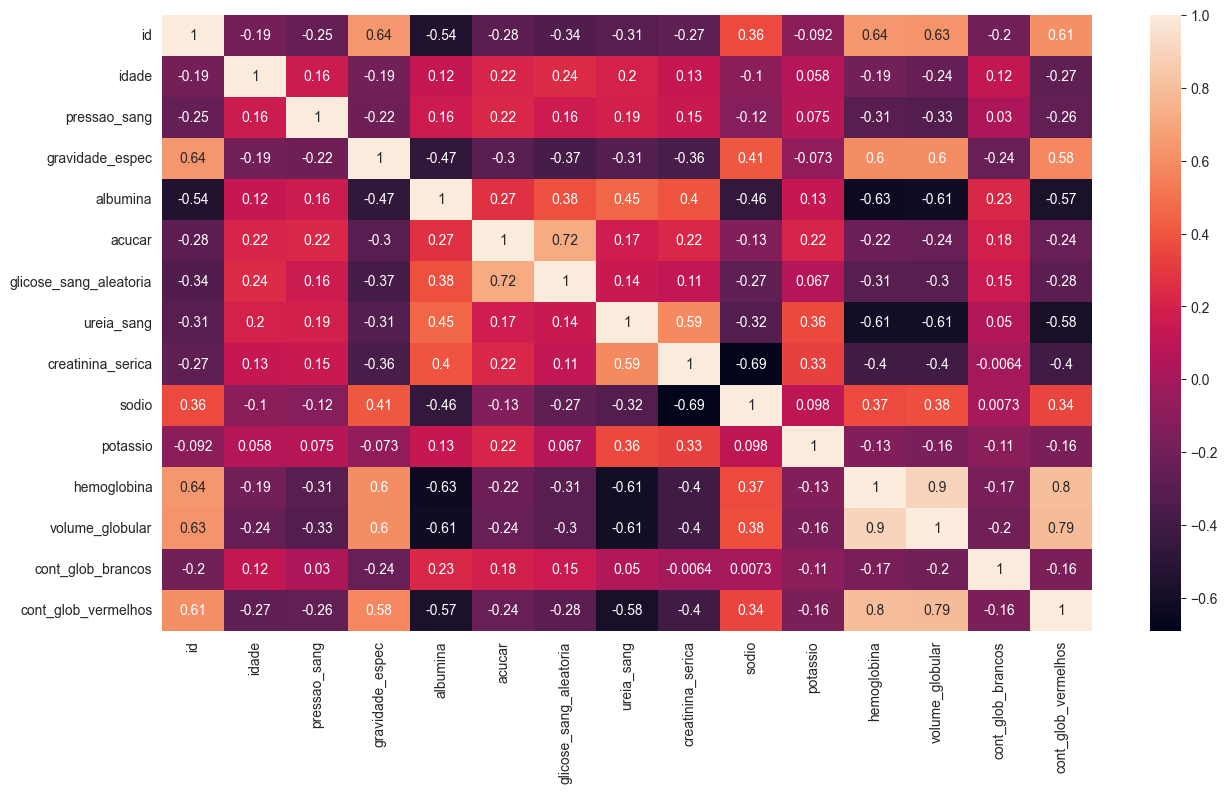

In [241]:
plt.figure(figsize = (15,8))
sns.heatmap(df_kidney.corr(), annot=True)

Verificação das linhas com dados ausentes

<Axes: >

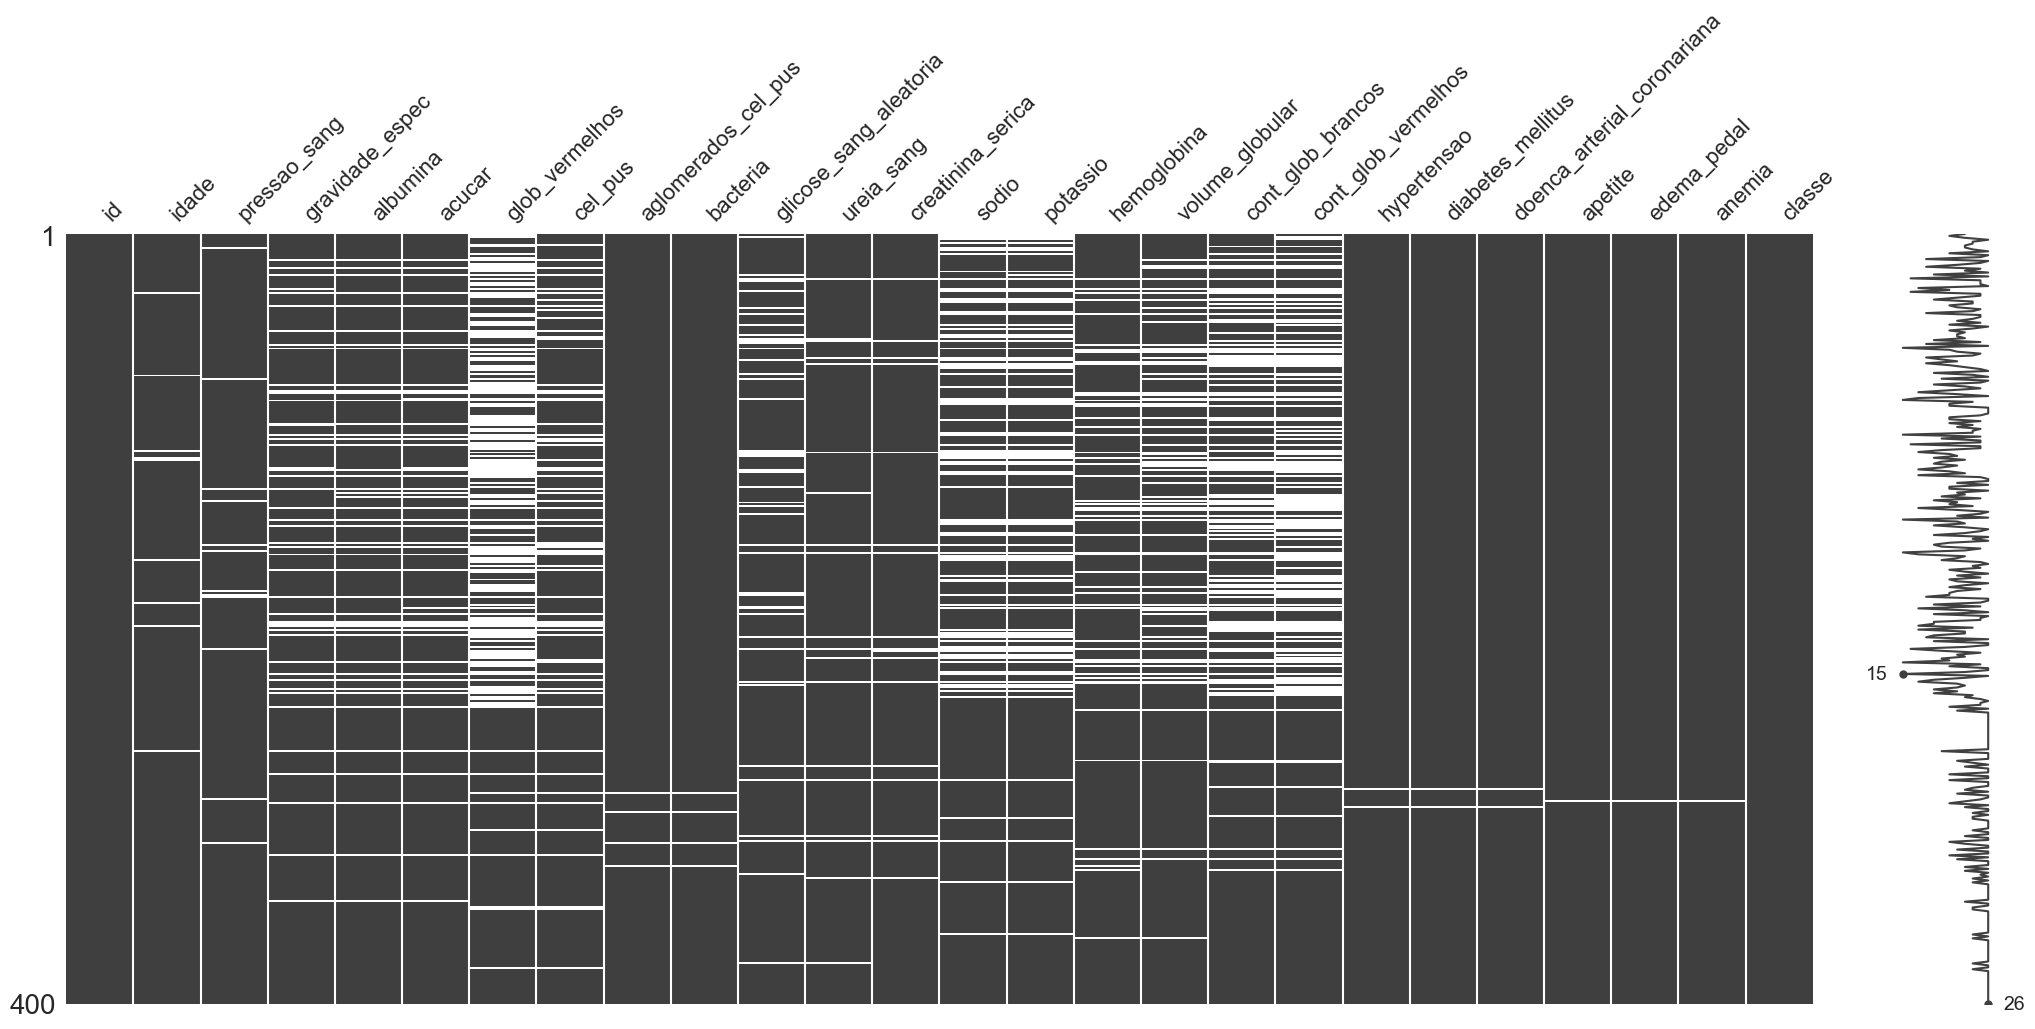

In [242]:
mno.matrix(df_kidney)

Como as colunas hemoglobina, volume_globular, cont_glob_vermelhos e glob_vermelhos têm correlação alta entre elas, optei por manter apenas a coluna 'hemoglobina' por ser a coluna com menos dados ausentes entre elas

In [267]:
df_kidney = df_kidney.drop(['cont_glob_vermelhos', 'glob_vermelhos', 'volume_globular'], axis = 1)

KeyError: "['cont_glob_vermelhos', 'glob_vermelhos', 'volume_globular'] not found in axis"

In [268]:
df_kidney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           400 non-null    float64
 1   idade                        400 non-null    float64
 2   pressao_sang                 400 non-null    float64
 3   gravidade_espec              400 non-null    float64
 4   albumina                     400 non-null    float64
 5   acucar                       400 non-null    float64
 6   cel_pus                      400 non-null    object 
 7   aglomerados_cel_pus          400 non-null    object 
 8   bacteria                     400 non-null    object 
 9   glicose_sang_aleatoria       400 non-null    float64
 10  ureia_sang                   400 non-null    float64
 11  creatinina_serica            400 non-null    float64
 12  sodio                        400 non-null    float64
 13  potassio            

In [245]:
df_kidney.isnull().sum().sort_values(ascending = False)/len(df_kidney)

cont_glob_brancos              0.2650
potassio                       0.2200
sodio                          0.2175
cel_pus                        0.1625
hemoglobina                    0.1300
acucar                         0.1225
gravidade_espec                0.1175
albumina                       0.1150
glicose_sang_aleatoria         0.1100
ureia_sang                     0.0475
creatinina_serica              0.0425
pressao_sang                   0.0300
idade                          0.0225
bacteria                       0.0100
aglomerados_cel_pus            0.0100
hypertensao                    0.0050
diabetes_mellitus              0.0050
doenca_arterial_coronariana    0.0050
anemia                         0.0025
apetite                        0.0025
edema_pedal                    0.0025
id                             0.0000
classe                         0.0000
dtype: float64

Uso do SimpleImputer para tratamento dos dados ausentes, optei por usar moda para os dados categoricos e media para os dados numéricos

In [246]:
from sklearn.impute import SimpleImputer
list_col_cat = df_kidney.select_dtypes(object).columns

imp_cat = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
imp_cat = imp_cat.fit(df_kidney[list_col_cat])
df_kidney[list_col_cat] = imp_cat.transform(df_kidney[list_col_cat])

In [247]:
list_col_num = df_kidney.select_dtypes(include = np.number).columns

imp_num = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imp_num = imp_cat.fit(df_kidney[list_col_num])
df_kidney[list_col_num] = imp_cat.transform(df_kidney[list_col_num])

In [248]:
df_kidney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           400 non-null    float64
 1   idade                        400 non-null    float64
 2   pressao_sang                 400 non-null    float64
 3   gravidade_espec              400 non-null    float64
 4   albumina                     400 non-null    float64
 5   acucar                       400 non-null    float64
 6   cel_pus                      400 non-null    object 
 7   aglomerados_cel_pus          400 non-null    object 
 8   bacteria                     400 non-null    object 
 9   glicose_sang_aleatoria       400 non-null    float64
 10  ureia_sang                   400 non-null    float64
 11  creatinina_serica            400 non-null    float64
 12  sodio                        400 non-null    float64
 13  potassio            

In [249]:
df_kidney_cat = df_kidney.select_dtypes(object)
for col in df_kidney_cat.columns:
    print(f'Valores da coluna {col}: {df_kidney_cat[col].unique()}\n')

Valores da coluna cel_pus: ['normal' 'abnormal']

Valores da coluna aglomerados_cel_pus: ['notpresent' 'present']

Valores da coluna bacteria: ['notpresent' 'present']

Valores da coluna hypertensao: ['yes' 'no']

Valores da coluna diabetes_mellitus: ['yes' 'no']

Valores da coluna doenca_arterial_coronariana: ['no' 'yes']

Valores da coluna apetite: ['good' 'poor']

Valores da coluna edema_pedal: ['no' 'yes']

Valores da coluna anemia: ['no' 'yes']

Valores da coluna classe: ['ckd' 'notckd']



## Pré processamento de dados

### Definição das features e do target

In [250]:
X = df_kidney.drop(columns=['id', 'classe'])
y = df_kidney['classe']

In [251]:
df_kidney['classe'].value_counts()

ckd       250
notckd    150
Name: classe, dtype: int64

### Definição da classe

In [252]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)
le.classes_

array(['ckd', 'notckd'], dtype=object)

ckd:0  notckd:1

Verificação do desbalanceamento entre os dados, para essa diferença não é necessário aplicar alguma técnica de balanceamento

In [254]:
df_kidney.classe.value_counts(normalize = True)

ckd       0.625
notckd    0.375
Name: classe, dtype: float64

In [255]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

Listas com os nomes das colunas numéricas e categóricas

In [256]:
list_col_catx = X.select_dtypes(object).columns
list_col_numx = X.select_dtypes(include = np.number).columns

### Pipeline do standardization das features numéricas e do encoder das features categóricas

In [258]:
pipe_num = Pipeline([('scaler', StandardScaler())])

pipe_cat = Pipeline([('cat_encoder', OrdinalEncoder())])

pre_processing = ColumnTransformer([
    ('transf_num', pipe_num, list_col_numx),
    ('transf_cat', pipe_cat, list_col_catx)
])

### Split de dados de teste e de treino

In [259]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 42)

PCA é um método de feature extraction que estava pensando em usar, mas não foi necessário

In [260]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

## Pipeline principal considerando o modelo de regressão logística

Apesar do nome regressão, esse modelo é de classificação

In [269]:
pipe_lr = Pipeline([
    ('pre_proc', pre_processing),
    # ('Feat_ext', PCA(n_components = 2)),
    ('LR', LogisticRegression(penalty = 'l2',
                              random_state = 42,
                              solver = 'lbfgs'))
])
pipe_lr

Pipeline(steps=[('pre_proc',
                 ColumnTransformer(transformers=[('transf_num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['idade', 'pressao_sang', 'gravidade_espec', 'albumina', 'acucar',
       'glicose_sang_aleatoria', 'ureia_sang', 'creatinina_serica', 'sodio',
       'potassio', 'hemoglobina', 'cont_glob_brancos'],
      dtype='object')),
                                                 ('transf_cat',
                                                  Pipeline(steps=[('cat_encoder',
                                                                   OrdinalEncoder())]),
                                                  Index(['cel_pus', 'aglomerados_cel_pus', 'bacteria', 'hypertensao',
       'diabetes_mellitus', 'doenca_arterial_coronariana', 'apetite',
       'edema_pedal', 'anemia'],
      dtype='object'))])),
                ('LR', LogisticRegression(random_state=42))])

### Curva de validação

In [262]:
from sklearn.metrics import classification_report
from sklearn.model_selection import validation_curve


Nessa curva de validação foi usado cross validation, os dados de treino são divididos em 10, e uma dessas 10 partes é usada para validar o modelo

O parâmetro C altera o 'passo' do modelo, valores mais altos tendem a diminuir o viés

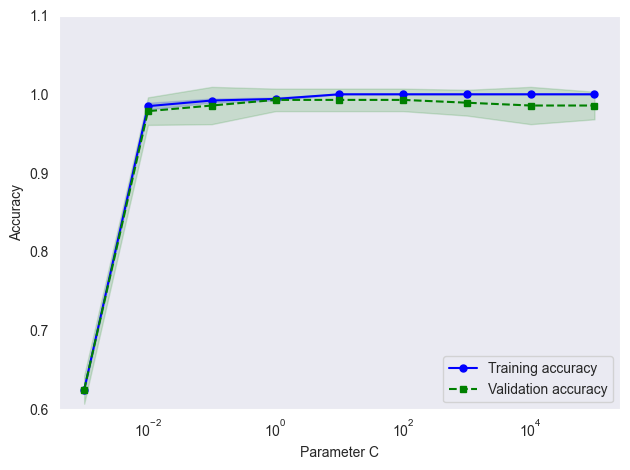

In [270]:
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000, 100000]
train_scores, test_scores = validation_curve(
                estimator=pipe_lr,
                X=X_train,
                y=y_train,
                param_name='LR__C',
                param_range=param_range,
                cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(param_range,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.6, 1.1])
plt.tight_layout()
# plt.savefig('images/06_06.png', dpi=300)
plt.show()

### Curva de aprendizado

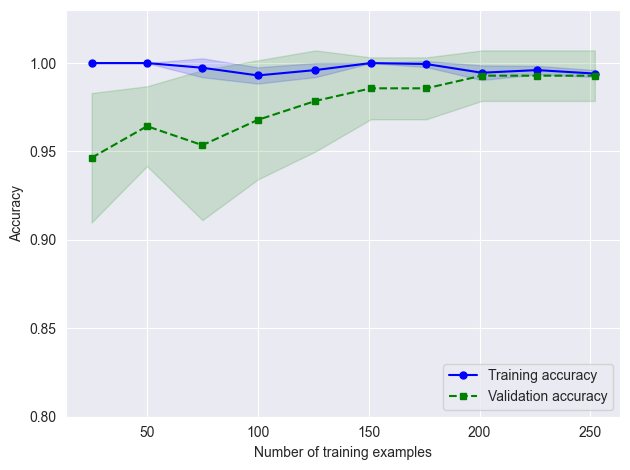

In [271]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe_lr,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid(visible = True)
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()
# plt.savefig('images/06_05.png', dpi=300)
plt.show()

### Randomized Search

Random search simples com variação de um parâmetro

In [273]:
from sklearn.model_selection import RandomizedSearchCV

param_range_rs = {'LR__C': range(0,10000)}


rs = RandomizedSearchCV( estimator = pipe_lr,
                         param_distributions = param_range_rs,
                         scoring = 'f1',
                         cv = 10,
                         refit = True,
                         n_jobs = -1)
rs = rs.fit(X_train, y_train)
rs.best_estimator_.get_params()

{'memory': None,
 'steps': [('pre_proc',
   ColumnTransformer(transformers=[('transf_num',
                                    Pipeline(steps=[('scaler', StandardScaler())]),
                                    Index(['idade', 'pressao_sang', 'gravidade_espec', 'albumina', 'acucar',
          'glicose_sang_aleatoria', 'ureia_sang', 'creatinina_serica', 'sodio',
          'potassio', 'hemoglobina', 'cont_glob_brancos'],
         dtype='object')),
                                   ('transf_cat',
                                    Pipeline(steps=[('cat_encoder',
                                                     OrdinalEncoder())]),
                                    Index(['cel_pus', 'aglomerados_cel_pus', 'bacteria', 'hypertensao',
          'diabetes_mellitus', 'doenca_arterial_coronariana', 'apetite',
          'edema_pedal', 'anemia'],
         dtype='object'))])),
  ('LR', LogisticRegression(C=161, random_state=42))],
 'verbose': False,
 'pre_proc': ColumnTransformer(transforme

### Grid Search

Grid search simples apenas para fazer uma comparação com o random search

In [272]:
from sklearn.model_selection import GridSearchCV

param_range_gs = [{'LR__C':param_range}]

gs = GridSearchCV(estimator = pipe_lr,
                  param_grid = param_range_gs,
                  scoring = 'f1',
                  cv = 10,
                  refit = True,
                  n_jobs = -1)
gs = gs.fit(X_train, y_train)
gs.best_estimator_.get_params()

{'memory': None,
 'steps': [('pre_proc',
   ColumnTransformer(transformers=[('transf_num',
                                    Pipeline(steps=[('scaler', StandardScaler())]),
                                    Index(['idade', 'pressao_sang', 'gravidade_espec', 'albumina', 'acucar',
          'glicose_sang_aleatoria', 'ureia_sang', 'creatinina_serica', 'sodio',
          'potassio', 'hemoglobina', 'cont_glob_brancos'],
         dtype='object')),
                                   ('transf_cat',
                                    Pipeline(steps=[('cat_encoder',
                                                     OrdinalEncoder())]),
                                    Index(['cel_pus', 'aglomerados_cel_pus', 'bacteria', 'hypertensao',
          'diabetes_mellitus', 'doenca_arterial_coronariana', 'apetite',
          'edema_pedal', 'anemia'],
         dtype='object'))])),
  ('LR', LogisticRegression(random_state=42))],
 'verbose': False,
 'pre_proc': ColumnTransformer(transformers=[('t